In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
data = pd.read_csv('../animal-predictions/Data_prep/Louisville_Animal_Cleaned.csv')

In [28]:
data.head()

,intype,insubtype,surreason,outtype,animaltype,sex,bites,petsize,color,breed,mixed,breed2,days_in,in_season,out_season
0,STRAY,OTC,STRAY,RTO,DOG,F,N,MED,TAN / BLACK,ENG BULLDOG,True,Unknown,3,SPRING,SPRING
1,STRAY,OTC,STRAY,ADOPTION,CAT,N,N,LARGE,ORG TABBY,DOMESTIC SH,False,NM,5,SPRING,SPRING
2,STRAY,OTC,STRAY,FOSTER,DOG,S,N,MED,CHOCOLATE / WHITE,PIT BULL,False,NM,26,SPRING,SPRING
3,STRAY,OTC,STRAY,ADOPTION,DOG,N,Y,PUPPY,TAN,PIT BULL,True,Unknown,13,SPRING,SPRING
4,STRAY,OTC,STRAY,EUTH,DOG,M,Y,MED,BL BRINDLE,PIT BULL,False,NM,9,SUMMER,SUMMER


In [29]:
#replace all nas with 0
# data = data.fillna('N/A')

In [30]:
data.columns

Index(['intype', 'insubtype', 'surreason', 'outtype', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'mixed', 'breed2', 'days_in',
       'in_season', 'out_season'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41963 entries, 0 to 41962
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   intype      41963 non-null  object
 1   insubtype   41963 non-null  object
 2   surreason   41963 non-null  object
 3   outtype     41963 non-null  object
 4   animaltype  41963 non-null  object
 5   sex         41963 non-null  object
 6   bites       41963 non-null  object
 7   petsize     41963 non-null  object
 8   color       41963 non-null  object
 9   breed       41963 non-null  object
 10  mixed       41963 non-null  bool  
 11  breed2      41963 non-null  object
 12  days_in     41963 non-null  int64 
 13  in_season   41963 non-null  object
 14  out_season  41963 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 4.5+ MB


In [32]:
#drop nulls
data = data.dropna()

In [33]:
#save columns names in a list
cols = data.columns.tolist()

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cols:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41963 entries, 0 to 41962
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   intype      41963 non-null  int32
 1   insubtype   41963 non-null  int32
 2   surreason   41963 non-null  int32
 3   outtype     41963 non-null  int32
 4   animaltype  41963 non-null  int32
 5   sex         41963 non-null  int32
 6   bites       41963 non-null  int32
 7   petsize     41963 non-null  int32
 8   color       41963 non-null  int32
 9   breed       41963 non-null  int32
 10  mixed       41963 non-null  bool 
 11  breed2      41963 non-null  int32
 12  days_in     41963 non-null  int64
 13  in_season   41963 non-null  int32
 14  out_season  41963 non-null  int32
dtypes: bool(1), int32(13), int64(1)
memory usage: 2.4 MB


Splitting the data into test and train sets

In [36]:
X = data.drop('outtype', axis=1)  # Features
y = data['outtype']  # Target variable

# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.68


In [37]:
#split data into test and train sets
train, test = train_test_split(data, test_size = 0.3)

In [38]:
#confirm balance
print(train['outtype'].value_counts())
print(test['outtype'].value_counts())

0     8487
4     4340
10    3879
11    3637
13    2567
3     1916
12    1501
7      918
2      639
9      513
5      370
14     317
1      265
6       15
8       10
Name: outtype, dtype: int64
0     3677
4     1848
10    1631
11    1601
13    1068
3      803
12     638
7      341
9      270
2      247
5      170
14     167
1      103
8       15
6       10
Name: outtype, dtype: int64


In [39]:
#find the proportions for outcomes for test and train
print(train['outtype'].value_counts()/len(train))
print(test['outtype'].value_counts()/len(test))


0     0.288929
4     0.147750
10    0.132056
11    0.123817
13    0.087390
3     0.065228
12    0.051100
7     0.031252
2     0.021754
9     0.017464
5     0.012596
14    0.010792
1     0.009022
6     0.000511
8     0.000340
Name: outtype, dtype: float64
0     0.292080
4     0.146795
10    0.129558
11    0.127175
13    0.084836
3     0.063786
12    0.050679
7     0.027087
9     0.021447
2     0.019620
5     0.013504
14    0.013266
1     0.008182
8     0.001192
6     0.000794
Name: outtype, dtype: float64


Creating a random forest model

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
#create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=15, random_state=42)

In [43]:
#train the dt model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, random_state=42)

In [44]:
#make predictions on the test data
y_pred = dt_model.predict(X_test)


In [45]:
#evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy:.2f}')


Accuracy of Decision Tree Classifier: 0.66


In [46]:
#print the feature importances
feature_importances = pd.DataFrame(dt_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
intype,0.209297
days_in,0.197824
sex,0.105358
petsize,0.091618
insubtype,0.082487
animaltype,0.078222
color,0.070876
surreason,0.047202
breed,0.040359
out_season,0.031970


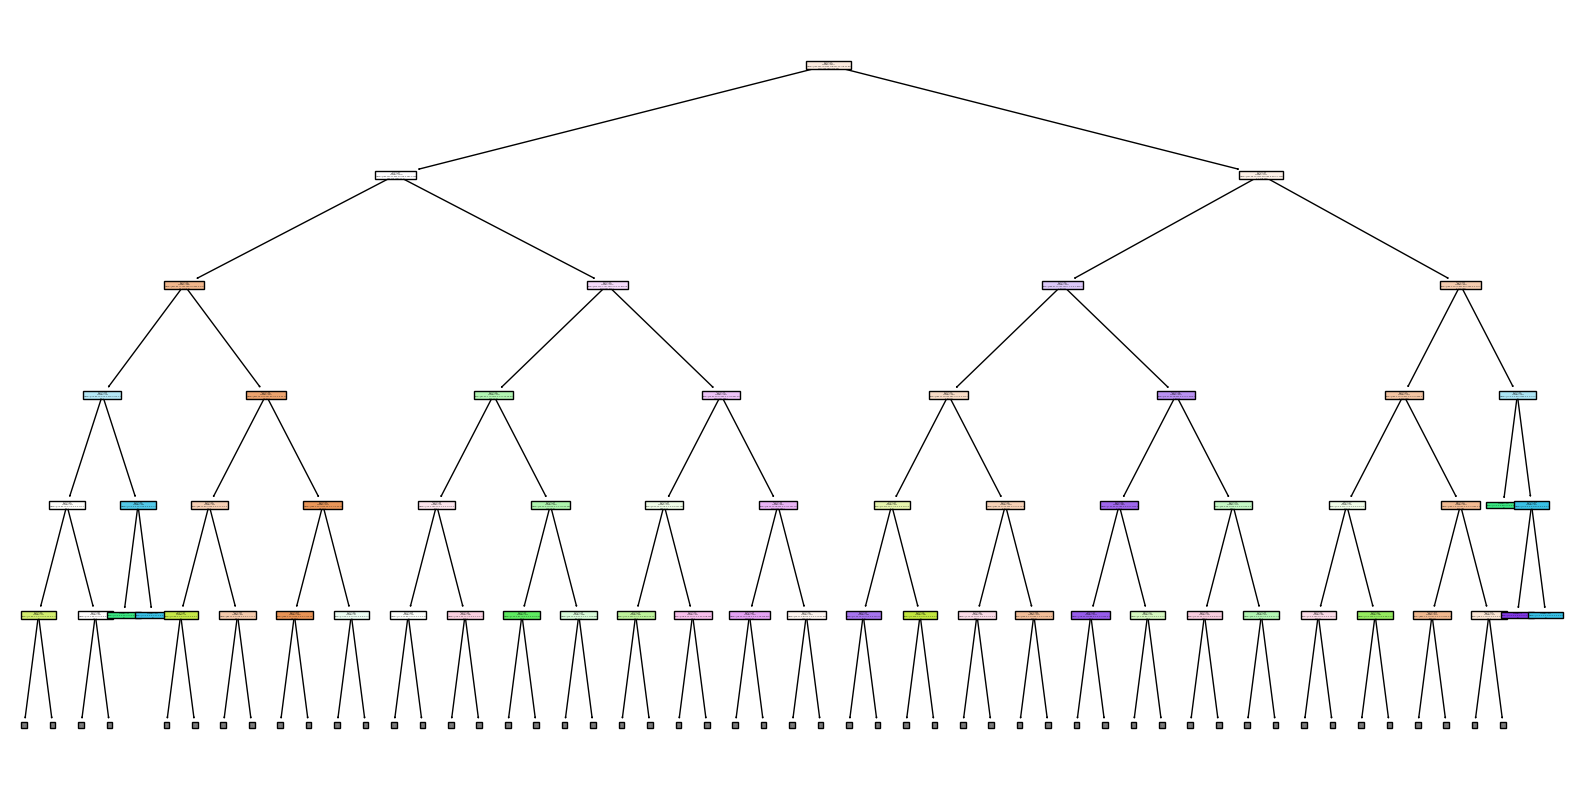

In [59]:
#create a visualization of the decision tree without the use of graphviz
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, max_depth=5, filled=True)
plt.show()
